## Image Enhancement

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Lenna_g.jpg',0)
print(img.shape)


(512, 512)


(512, 512)


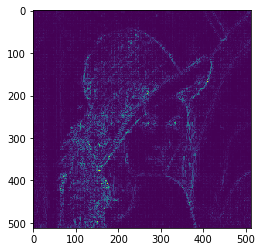

In [2]:
## Laplacian filter
    
W = int(img.shape[0])
H = int(img.shape[1])

# lapla2 =np.array([[-1,-1,-1],
#                   [-1,8,-1],
#                   [-1,-1,-1]])

lapla2 = np.array([[ 0,-1, 0],
                   [-1, 4,-1],
                   [ 0,-1, 0]])


la2Img = np.zeros((W,H), dtype=np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        la2Img[i, j] = abs(np.sum(img[i-1:i+2 , j-1:j+2 ] * lapla2))

print(la2Img.shape)

cv2.imwrite('Lapla2Img.jpg', la2Img)
plt.imshow(la2Img)
plt.show()        


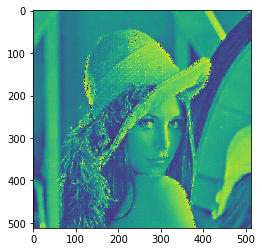

In [11]:
## Combine origin & Lapla image
W = int(img.shape[0])
H = int(img.shape[1])

combine01 = np.zeros((W,H), dtype=np.uint8)

for i in range(W):
    for j in range(H):
        combine01[i,j] = int(la2Img[i,j])+int(img[i,j])

cv2.imwrite('Combine lapla2 & origin.jpg', combine01)
plt.imshow(combine01)
plt.show()

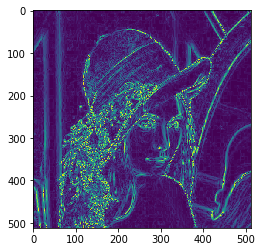

In [4]:
## Sobel(一階微分找edge)

W = int(img.shape[0])
H = int(img.shape[1])

Sb_XY = np.zeros((W, H),dtype=np.uint8)
Sb_X = np.zeros(img.shape)
Sb_Y = np.zeros(img.shape)


x = np.array([[-1,0,1],
              [-2,0,2],
              [-1,0,1]])

y = np.array([[-1,-2,-1],
              [0, 0, 0],
              [1, 2, 1]])

for i in range(1,W-1):
    for j in range(1,H-1):
        Sb_X[i,j] = abs(np.sum(img[i-1:i+2 , j-1:j+2 ] * x))        
        Sb_Y[i,j] = abs(np.sum(img[i-1:i+2 , j-1:j+2 ] * y)) 
        Sb_XY[i,j] = (Sb_X[i,j]*Sb_X[i,j] + Sb_Y[i,j]*Sb_Y[i,j])**0.5

cv2.imwrite('SobelImg.jpg', Sb_XY)
plt.imshow(Sb_XY)
plt.show()

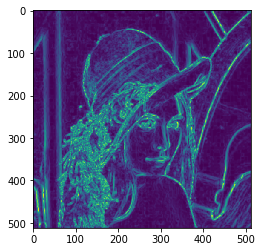

In [5]:
## 去雜訊 Blur & Smooth
Blur = np.ones((3, 3), dtype="int") * (1 / (3 * 3))

W = int(img.shape[0])
H = int(img.shape[1])
blurImg = np.zeros((W,H), dtype=np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        blurImg[i,j] = abs(np.sum(Sb_XY[i-1:i+2 , j-1:j+2] * Blur))

cv2.imwrite('Blured_Smooth.jpg', blurImg)
plt.imshow(blurImg)
plt.show()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00784314 0.01176471 ... 0.23137255 0.20784314 0.        ]
 [0.         0.01176471 0.01960784 ... 0.34509805 0.32156864 0.        ]
 ...
 [0.         0.06666667 0.09803922 ... 0.07450981 0.05098039 0.        ]
 [0.         0.04705882 0.07450981 ... 0.05098039 0.03529412 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


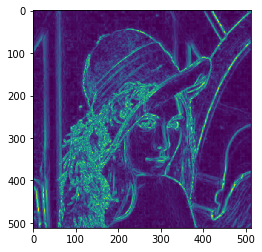

In [12]:
## 正規化 [0,1]

# normalized = blurImg - np.min(blurImg) / np.max(blurImg) - np.min(blurImg)

W = int(img.shape[0])
H = int(img.shape[1])

normalized = np.zeros((W,H), dtype = np.float32)

for i in range(W):
    for j in range(H):
        normalized[i,j] = float(int(blurImg[i,j])/255)
        
print(normalized)
cv2.imwrite('Normalize.jpg', normalized)
plt.imshow(normalized)
plt.show()

cv2.imshow('Normalize', normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

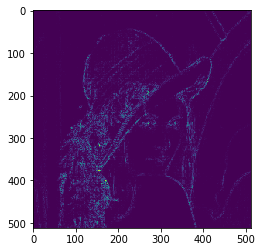

In [7]:
## normalize 後乘上 Lapla_Image 

W = int(img.shape[0])
H = int(img.shape[1])

La2_mult_normal = np.zeros((W,H), dtype= np.uint8)

for i in range(W):
    for j in range(H):
        La2_mult_normal[i,j] = (normalized[i,j]) * (la2Img[i, j])

cv2.imwrite('Multiple.jpg', La2_mult_normal)
plt.imshow(La2_mult_normal)
plt.show()

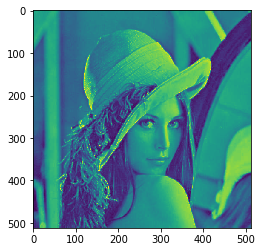

In [8]:
## 原圖加上 La2_mult_normal
W = int(img.shape[0])
H = int(img.shape[1])

Orig_plus_La2norm = np.zeros((W,H), dtype = np.uint8)

for i in range(W):
    for j in range(H):
        if int(img[i,j]) + int(La2_mult_normal[i,j]) >255:
            Orig_plus_La2norm[i,j] = 255
        else:
            Orig_plus_La2norm[i,j] = int(img[i,j]) + int(La2_mult_normal[i,j])


cv2.imwrite('Origin + La2_mult_normal.jpg', Orig_plus_La2norm)
plt.imshow(Orig_plus_La2norm)
plt.show()